In [2]:
%load_ext autoreload
%autoreload 2

In [33]:
import pandas as pd
import data
from IPython.display import HTML
import myWidgets
import logisticRegression
import numpy as np
from sklearn.metrics import confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt

df = data.get_data()

Le but de ce projet est de construire un modèle de prédiction simple afin de me familiariser avec les concepts de base d'intelligence artificielle. 

Le projet va devoir prédire quels clients sont plus susceptibles d'acheter une assurance caravane en fonction des données provenant du CoIL 2000 Challenge. 

In [34]:
display(myWidgets.VarComparator(df.columns, df).get_widget())

In [91]:
discrete_vars, continuous_vars = data.get_var_by_types(df)
#corr = df.corr(numeric_only=True).loc[['CARAVAN']].sort_values(by='CARAVAN', axis=1, ascending=False).drop(columns='CARAVAN')
#corr_continuous = df[continuous_vars].corr().loc[['CARAVAN']].drop(columns=['CARAVAN'])
corr_discrete = df[discrete_vars + ['CARAVAN']].corr(method='spearman').loc[['CARAVAN']].sort_values(by='CARAVAN', axis=1, ascending=False).drop(columns=['CARAVAN'])

#corr_combined = pd.concat([corr_continuous, corr_discrete], axis=1).sort_values(by='CARAVAN', axis=1, ascending=False)
corr_top = corr_discrete.unstack().sort_values(ascending=False) #2d a 1d (A,B)
corr_combined = corr_discrete.style.background_gradient(cmap='coolwarm', axis=None).format(precision=4)

display(HTML(corr_combined.to_html()))


,PPERSAUT,APERSAUT,APLEZIER,PPLEZIER,PBRAND,MINKGEM,PWAPART,MKOOPKLA,AWAPART,MHKOOP,MOPLHOOG,MAUT1,MINK4575,ABRAND,ABYSTAND,MRELGE,PBYSTAND,MINK7512,MSKA,MBERHOOG,MZPART,MBERMIDD,MOPLMIDD,MGEMOMV,MGODPR,PGEZONG,AGEZONG,MSKB1,PWAOREG,AWAOREG,AFIETS,MFWEKIND,PFIETS,MBERZELF,AZEILPL,PZEILPL,MGODRK,ALEVEN,AINBOED,PINBOED,PLEVEN,PAANHANG,AAANHANG,AMOTSCO,PMOTSCO,MAUT2,MFGEKIND,MSKB2,MINK123M,MGODOV,MGEMLEEF,AWABEDR,PWABEDR,MAANTHUI,MINK3045,PBESAUT,ABESAUT,APERSONG,PPERSONG,AVRAAUT,PVRAAUT,PWERKT,AWERKT,PTRACTOR,ATRACTOR,AWALAND,PWALAND,MRELSA,MGODGE,ABROM,PBROM,MSKC,MBERARBG,MFALLEEN,MZFONDS,MBERBOER,MBERARBO,MOSTYPE,MRELOV,MSKD,MOSHOOFD,MAUT0,MHHUUR,MINKM30,MOPLLAAG
CARAVAN,0.1637,0.1495,0.1064,0.1064,0.1006,0.1002,0.0953,0.0947,0.0900,0.0799,0.0782,0.0734,0.0699,0.0695,0.0682,0.0682,0.0681,0.0632,0.0600,0.0572,0.0554,0.0410,0.0399,0.0355,0.0348,0.0337,0.0335,0.0309,0.0303,0.0303,0.0289,0.0287,0.0287,0.0266,0.0262,0.0262,0.0196,0.0193,0.0191,0.0190,0.0186,0.0146,0.0145,0.0103,0.0099,0.0084,0.0075,0.0073,0.0072,0.0041,0.0039,0.0006,0.0006,-0.0011,-0.0063,-0.0069,-0.0070,-0.0085,-0.0085,-0.0099,-0.0099,-0.0152,-0.0152,-0.0165,-0.0167,-0.0213,-0.0213,-0.0274,-0.0414,-0.0452,-0.0452,-0.0485,-0.0508,-0.0517,-0.0562,-0.0565,-0.0572,-0.0580,-0.0581,-0.0611,-0.0615,-0.0775,-0.0806,-0.0815,-0.0907


Les 10 variables les plus correlated avec la cible sont :

In [92]:
data.top_index_and_values(10 ,corr_top)

Contribution car policies                          PPERSAUT   - 0.1637
Number of car policies                             APERSAUT   - 0.1495
Number of boat policies                            APLEZIER   - 0.1064
Contribution boat policies                         PPLEZIER   - 0.1064
Contribution fire policies                         PBRAND     - 0.1006
Average income                                     MINKGEM    - 0.1002
Contribution private third party insurance see L4  PWAPART    - 0.0953
Purchasing power class                             MKOOPKLA   - 0.0947
Number of private third party insurance 1 - 12     AWAPART    - 0.0900
Home owners                                        MHKOOP     - 0.0799


In [111]:
X = df.drop('CARAVAN', axis=1) 
if 'CARAVAN' in continuous_vars:
    continuous_vars.remove('CARAVAN')
if 'CARAVAN' in discrete_vars:
    discrete_vars.remove('CARAVAN')

y = df['CARAVAN']  #targets
y_test_data = np.array(df['CARAVAN'].values)

# X[continuous_vars] = (X[continuous_vars] - X[continuous_vars].mean(axis=0)) / X[continuous_vars].std(axis=0)

X_encoded = pd.get_dummies(X, columns=discrete_vars)
#X_final = np.array(X_encoded) 
X_final = np.concatenate([X[continuous_vars].values, X_encoded], axis=1) #c tlm plus vite a train? mais g pas bsn de X[continuous...]

In [112]:
w,b = logisticRegression.logistic_regression(X_final, y)

Iteration 0: Cost = 0.6931471805599453
Iteration 100: Cost = 0.22261992147324047
Iteration 200: Cost = 0.21968782964508252
Iteration 300: Cost = 0.2172291994719926
Iteration 400: Cost = 0.2150673601831394
Iteration 500: Cost = 0.21316123019895133
Iteration 600: Cost = 0.21147520942984274
Iteration 700: Cost = 0.2099784272401155
Iteration 800: Cost = 0.20864428104697258
Iteration 900: Cost = 0.20744995419776413


In [ ]:
threshold = 0.1
y_prediction = logisticRegression.predict(X_encoded, w, b, threshold)
accuracy = np.mean(y_prediction == y_test_data)
conf_matrix = confusion_matrix(y_test_data, y_prediction)
print(accuracy)
print(conf_matrix)
print()
print(np.bincount(y_test_data))

0.8861020443222813
[[5030  443]
 [ 220  128]]
[5473  348]


[0.11282218 0.27856366 0.        ]


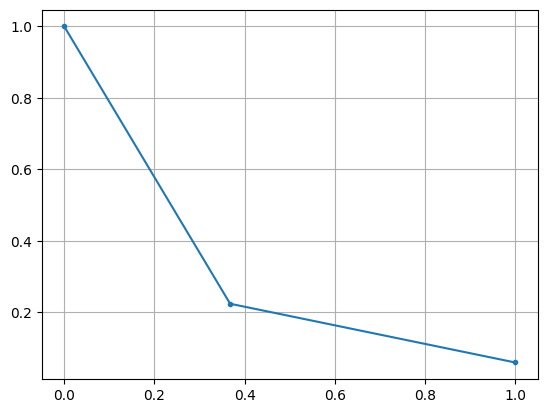

In [86]:
precision, recall, thresholds = precision_recall_curve(y_test_data, y_prediction)

plt.plot(recall, precision, marker='.')
f1 = 2* (precision * recall)/(precision + recall)
plt.grid(True)
print(f1)
plt.show()

In [ ]:
data.compare_models()


version: 1
Premiere version car 
0.5902765847792476
[[3162 2311]
 [  74  274]]

version: 2
Ajout du traitement des variables discrètes en variables binaires car Certaine variables sont discrètes
0.8739048273492527
[[4944  529]
 [ 205  143]]

version: 3
Traitement de tout les variables en variables binaires car Tout les variables sont discrètes
0.8861020443222813
[[5030  443]
 [ 220  128]]



In [ ]:
data.save_model_state(w,b,threshold,accuracy,conf_matrix,3)